In [65]:
import torch
import matplotlib.pyplot as plt
import helper_function
from torch import nn
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split


In [66]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [67]:
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

X_blob, y_blob = make_blobs(n_samples=1000, 
                             n_features=NUM_FEATURES,
                             centers=NUM_CLASSES, 
                             cluster_std=1.5,
                             random_state=RANDOM_SEED)

In [68]:
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.long)

In [69]:
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size=0.2, random_state=RANDOM_SEED)

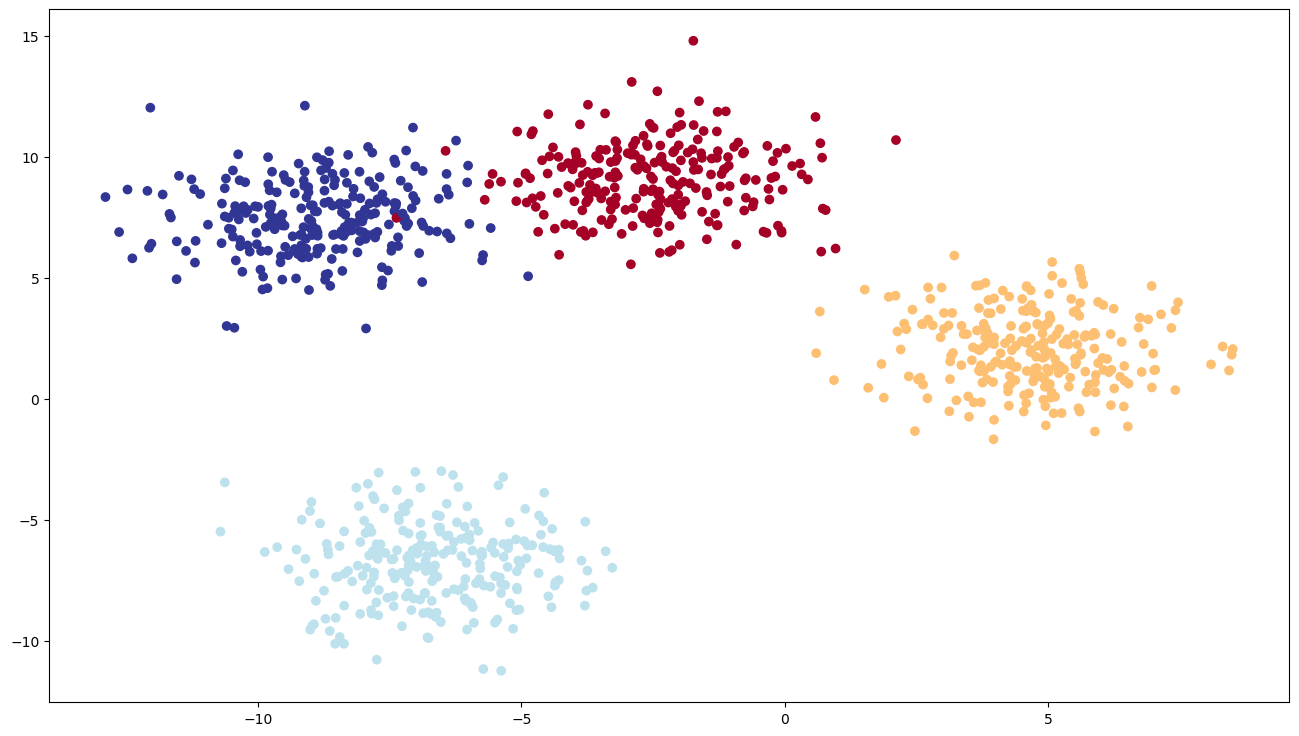

In [70]:
plt.figure(figsize=(16, 9))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu)

In [71]:
class BlobModel(nn.Module):
    def __init__(self, input_size, output_size, hidden_unit=8):
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(input_size, hidden_unit),
            #nn.ReLU(),
            nn.Linear(hidden_unit, hidden_unit),
            #nn.ReLU(),
            nn.Linear(hidden_unit, output_size)
        )
    def forward(self, x):
        return self.linear_layer_stack(x)

In [72]:
model_4 = BlobModel(input_size=2, output_size=4, hidden_unit=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [73]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model_4.parameters(), lr=0.1)

In [74]:
torch.manual_seed(RANDOM_SEED)
torch.cuda.manual_seed(RANDOM_SEED)

epochs = 100

X_blob_train, y_blob_train, X_blob_test, y_blob_test = X_blob_train.to(device), y_blob_train.to(device), X_blob_test.to                                                      (device), y_blob_test.to(device)

In [75]:
for epoch in range(epochs):
    
    model_4.train()
    y_logits = model_4(X_blob_train)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
    
    loss= loss_fn(y_logits, y_blob_train)
    acc = helper_function.accury_fn(y_blob_train, y_pred)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    model_4.eval()
    with torch.inference_mode():
        test_logits = model_4(X_blob_test)
        test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
        
        test_loss = loss_fn(test_logits, y_blob_test)
        test_acc = helper_function.accury_fn(y_blob_test, test_pred)
    
    if epoch % 5 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test loss: {test_loss:.4f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 1.0432, Acc: 65.50% | Test loss: 0.4828, Test acc: 75.00%
Epoch: 5 | Loss: 0.1356, Acc: 94.25% | Test loss: 0.1130, Test acc: 96.50%
Epoch: 10 | Loss: 0.0734, Acc: 97.88% | Test loss: 0.0160, Test acc: 99.00%
Epoch: 15 | Loss: 0.0557, Acc: 98.25% | Test loss: 0.0344, Test acc: 99.50%
Epoch: 20 | Loss: 0.0484, Acc: 98.75% | Test loss: 0.0080, Test acc: 100.00%
Epoch: 25 | Loss: 0.0372, Acc: 99.25% | Test loss: 0.0227, Test acc: 99.50%
Epoch: 30 | Loss: 0.0325, Acc: 99.00% | Test loss: 0.0036, Test acc: 100.00%
Epoch: 35 | Loss: 0.0272, Acc: 99.38% | Test loss: 0.0146, Test acc: 99.50%
Epoch: 40 | Loss: 0.0243, Acc: 99.12% | Test loss: 0.0050, Test acc: 100.00%
Epoch: 45 | Loss: 0.0212, Acc: 99.50% | Test loss: 0.0084, Test acc: 99.50%
Epoch: 50 | Loss: 0.0192, Acc: 99.50% | Test loss: 0.0089, Test acc: 99.50%
Epoch: 55 | Loss: 0.0194, Acc: 99.38% | Test loss: 0.0076, Test acc: 100.00%
Epoch: 60 | Loss: 0.0191, Acc: 99.50% | Test loss: 0.0082, Test acc: 100.00%
Epoch: 65

In [76]:
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
y_pred[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

In [77]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

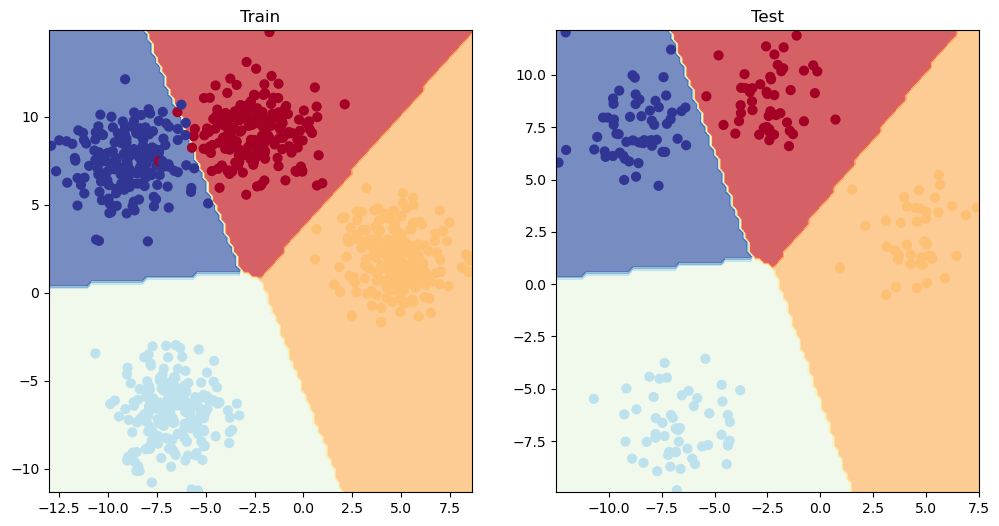

In [78]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
helper_function.plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
helper_function.plot_decision_boundary(model_4, X_blob_test, y_blob_test)

In [80]:
import torchmetrics

'0.19.0'